In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import imutils
import pytesseract
%matplotlib inline

In [4]:
def show_image(image, cmap = None, fig_size = (10, 10)):
    fig, ax = plt.subplots(figsize=fig_size)
    ax.imshow(image, cmap = cmap)
    ax.axis('on')
    plt.show()

## 1. Contours

### 1.1 Finding and Drawing Contours

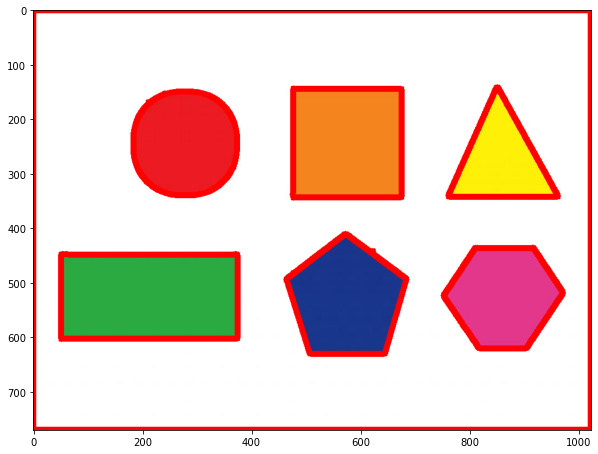

In [5]:
image = cv2.imread('../img/shapes.png')
gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
ret,thresh = cv2.threshold(gray,230,255,0)
contours, hierarchy = cv2.findContours(thresh,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
# always clone it, you cannot use the image itself or you will modify it
clone = image.copy()
clone = cv2.drawContours(clone, contours, -1, (0,0,255), 10)
show_image(np.flip(clone, axis=2))

In [6]:
len(contours) # is  a list of points

# also edge are taken  when counting.

11

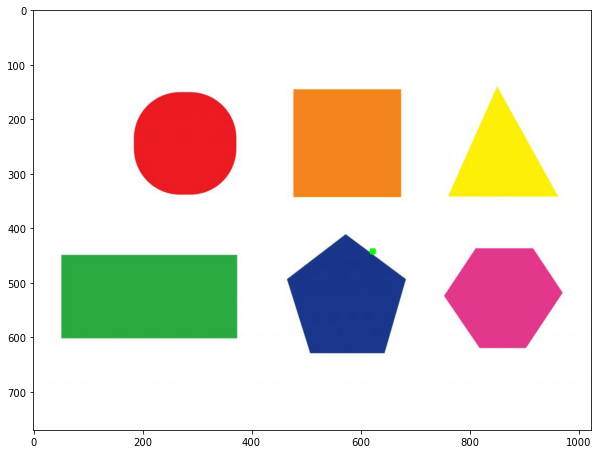

In [7]:
clone = image.copy()
cnt = contours[3]
clone = cv2.drawContours(clone.copy(), [cnt], 0, (0,255,0), 10)
show_image(np.flip(clone, axis=2))

### 1.2 Basic Contour Features

#### 1.2.1 Contour Area and Perimeter

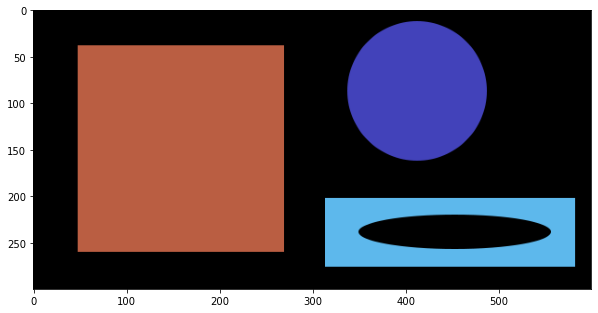

Contour #1 -- area: 6008.00, perimeter: 449.82


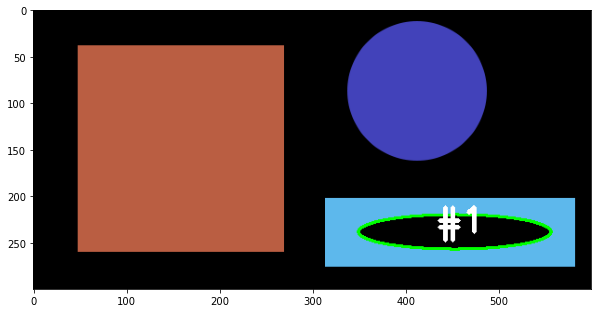

Contour #2 -- area: 19564.00, perimeter: 682.00


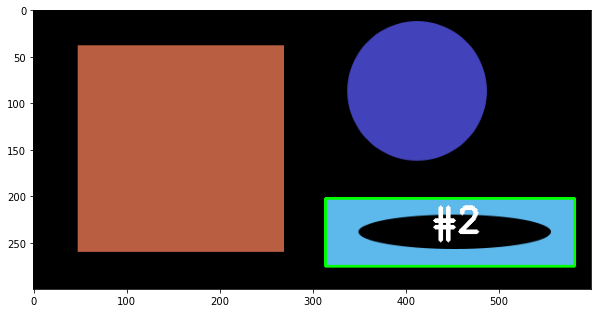

Contour #3 -- area: 48841.00, perimeter: 884.00


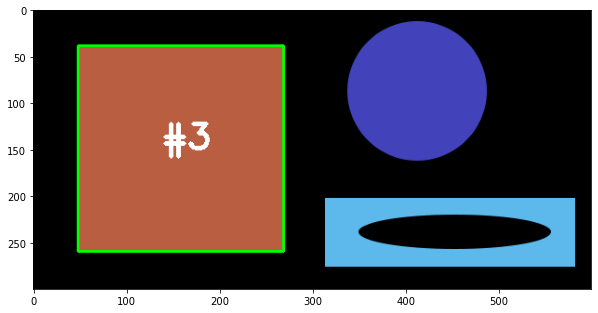

Contour #4 -- area: 17647.00, perimeter: 495.24


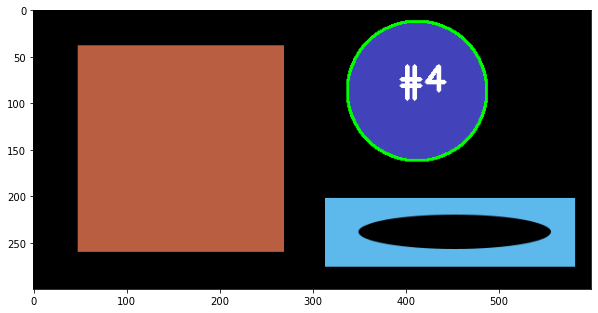

In [8]:
image = cv2.imread('../img/basic_shapes.png')
show_image(image)
gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
ret,thresh = cv2.threshold(gray,10,255,0)
contours = cv2.findContours(thresh, 1, 2)[0]

cnt = contours[0]
M = cv2.moments(cnt)
cx = int(M['m10']/M['m00'])
cy = int(M['m01']/M['m00'])

# loop over the contours again
for (i, c) in enumerate(contours):
    # compute the area and the perimeter of the contour
    area = cv2.contourArea(c)
    perimeter = cv2.arcLength(c, True)
    clone = image.copy()
    print("Contour #{} -- area: {:.2f}, perimeter: {:.2f}".format(i + 1, area, perimeter))
 
    # draw the contour on the image
    cv2.drawContours(clone, [c], -1, (0, 255, 0), 2)
 
    # compute the center of the contour and draw the contour number
    M = cv2.moments(c)
    cX = int(M["m10"] / M["m00"])
    cY = int(M["m01"] / M["m00"])
    cv2.putText(clone, "#{}".format(i + 1), (cX - 20, cY), cv2.FONT_HERSHEY_SIMPLEX,
        1.25, (255, 255, 255), 4)
    
    show_image(clone)

#### 1.2.4 Contour Bounding Boxes

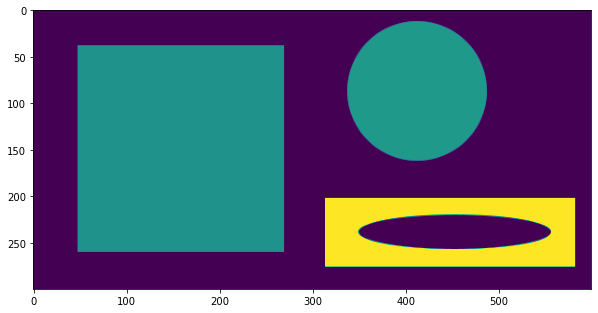

Contour #1


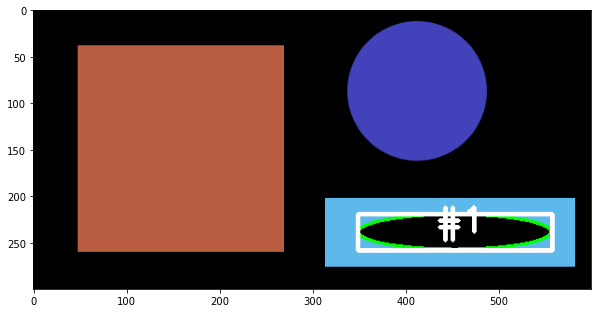

Contour #2


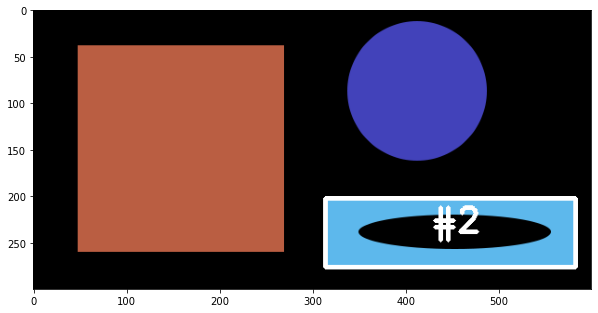

Contour #3


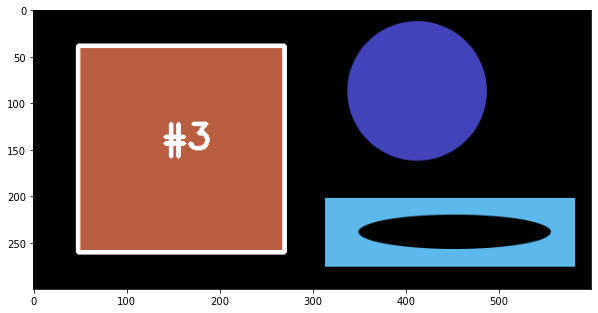

Contour #4


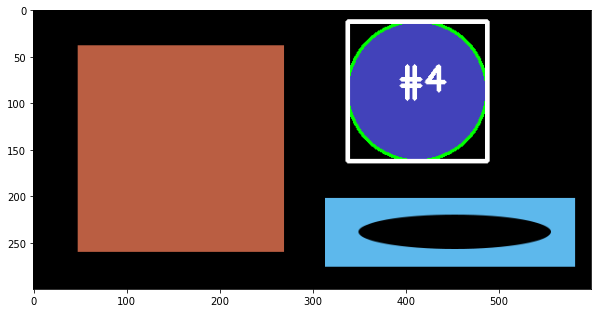

In [9]:
image = cv2.imread('../img/basic_shapes.png')
gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
show_image(gray)
ret,thresh = cv2.threshold(gray,10,255,0)
contours = cv2.findContours(thresh, 1, 2)[0]

# loop over the contours again
for (i, c) in enumerate(contours):
    clone = image.copy()
    print("Contour #{}".format(i + 1))
 
    # draw the contour on the image
    cv2.drawContours(clone, [c], -1, (0, 255, 0), 2)
 
    # compute the center of the contour and draw the contour number
    M = cv2.moments(c)
    cX = int(M["m10"] / M["m00"])
    cY = int(M["m01"] / M["m00"])
    cv2.putText(clone, "#{}".format(i + 1), (cX - 20, cY), cv2.FONT_HERSHEY_SIMPLEX,
        1.25, (255, 255, 255), 4)
    
    x,y,w,h = cv2.boundingRect(c)
    cv2.rectangle(clone,(x,y),(x+w,y+h),(255,255,255),4)
    
    show_image(clone)

#### 1.2.5 Contour Minimum Enclosing Circles

Contour #1


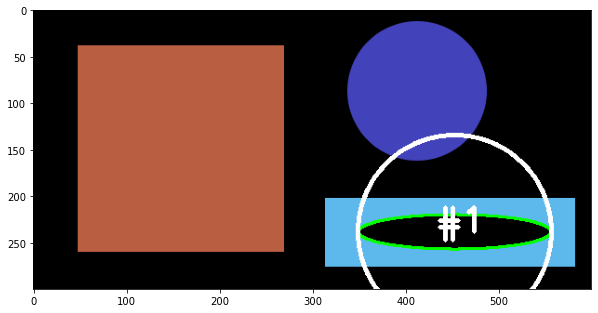

Contour #2


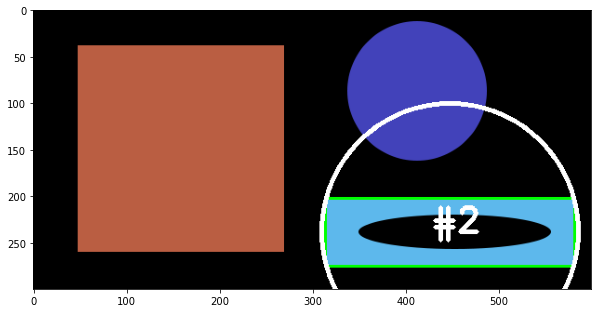

Contour #3


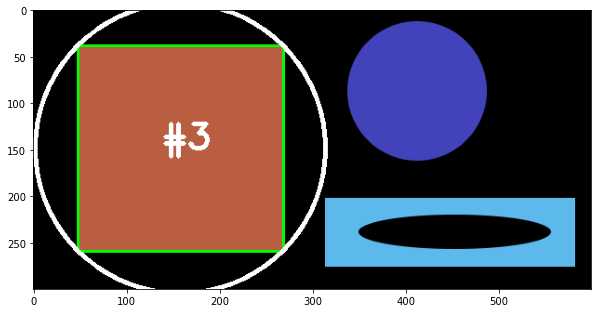

Contour #4


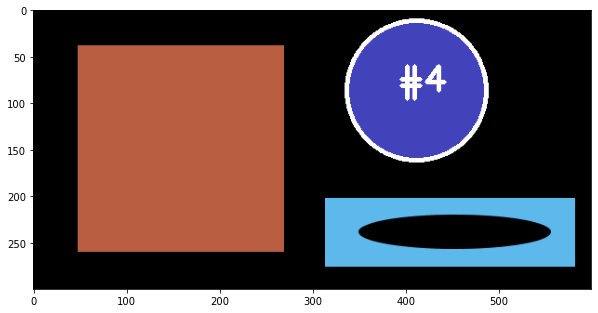

In [10]:
image = cv2.imread('../img/basic_shapes.png')
gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
ret,thresh = cv2.threshold(gray,10,255,0)
contours = cv2.findContours(thresh, 1, 2)[0]

# loop over the contours again
for (i, c) in enumerate(contours):
    clone = image.copy()
    print("Contour #{}".format(i + 1))
 
    # draw the contour on the image
    cv2.drawContours(clone, [c], -1, (0, 255, 0), 2)
 
    # compute the center of the contour and draw the contour number
    M = cv2.moments(c)
    cX = int(M["m10"] / M["m00"])
    cY = int(M["m01"] / M["m00"])
    cv2.putText(clone, "#{}".format(i + 1), (cX - 20, cY), cv2.FONT_HERSHEY_SIMPLEX,
        1.25, (255, 255, 255), 4)
    
    (x,y),radius = cv2.minEnclosingCircle(c)
    center = (int(x),int(y))
    radius = int(radius)
    clone = cv2.circle(clone,center,radius,(255,255,255),4)
    
    show_image(clone)

#### 1.2.6 Fitting an Ellipse

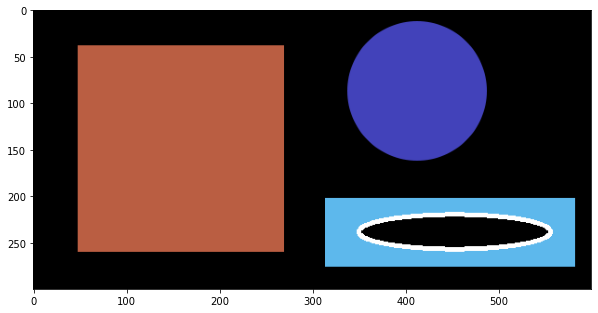

In [11]:
image = cv2.imread('../img/basic_shapes.png')
gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
ret,thresh = cv2.threshold(gray,10,255,0)
contours = cv2.findContours(thresh, 1, 2)[0]
 
ellipse = cv2.fitEllipse(contours[0])
cv2.ellipse(image,ellipse,(255,255,255),4)

show_image(image)

### EXERCISE: Fit a circle, bounding box and ellipse to objects of an image. What are their properties?

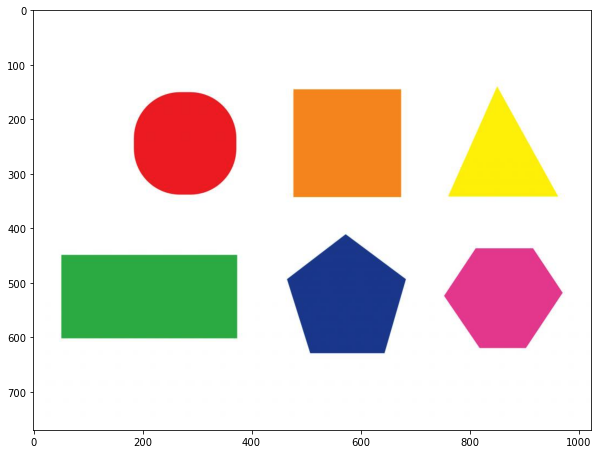

In [12]:
image = np.flip(cv2.imread('../img/shapes.png'), axis =2 )
show_image(image)

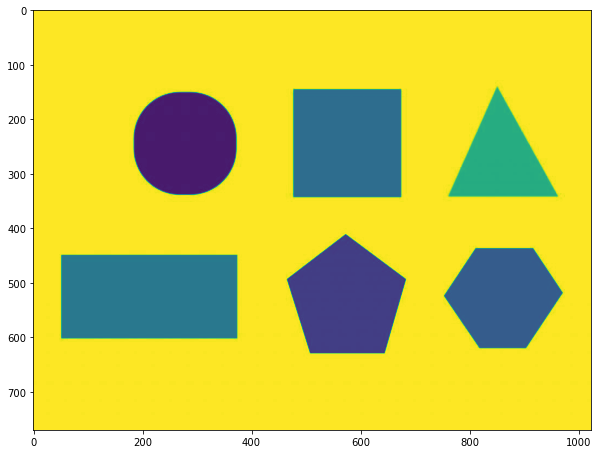

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


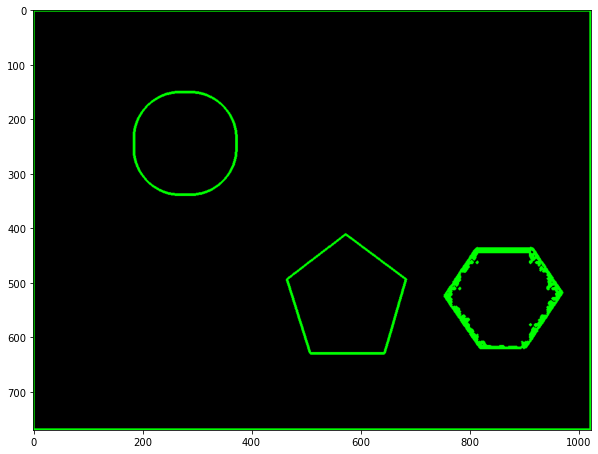

In [13]:
# find contours in image

img_grey = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
show_image(img_grey)
thresh = 100
#get threshold image
ret,thresh_img = cv2.threshold(img_grey, thresh, 255, cv2.THRESH_BINARY)
#find contours
contours, hierarchy = cv2.findContours(thresh_img, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

#create an empty image for contours
img_contours = np.zeros(image.shape)
# draw the contours on the empty image
cv2.drawContours(img_contours, contours, -1, (0,255,0), 3)
show_image(img_contours)

Gray image
Contour #1 -- area: 786687.00, perimeter: 3584.00


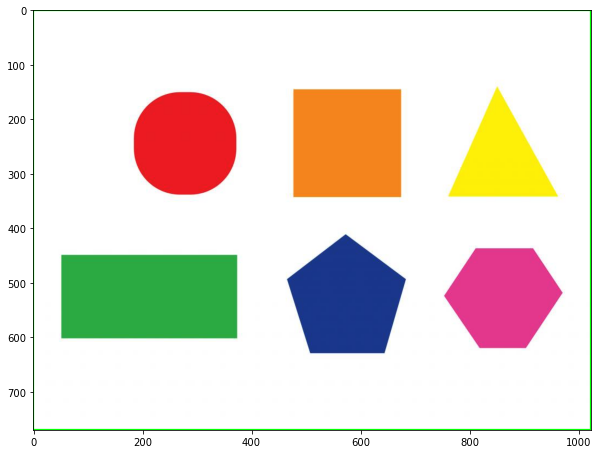

In [14]:
gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
print("Gray image")
ret,thresh = cv2.threshold(gray,10,255,0)
contours = cv2.findContours(thresh, 1, 2)[0]

cnt = contours[0]
M = cv2.moments(cnt)
cx = int(M['m10']/M['m00'])
cy = int(M['m01']/M['m00'])

# loop over the contours again
for (i, c) in enumerate(contours):
    # compute the area and the perimeter of the contour
    area = cv2.contourArea(c)
    perimeter = cv2.arcLength(c, True)
    clone = image.copy()
    print("Contour #{} -- area: {:.2f}, perimeter: {:.2f}".format(i + 1, area, perimeter))
 
    # draw the contour on the image
    cv2.drawContours(clone, [c], -1, (0, 255, 0), 2)
 
    # compute the center of the contour and draw the contour number
    M = cv2.moments(c)
    cX = int(M["m10"] / M["m00"])
    cY = int(M["m01"] / M["m00"])
    cv2.putText(clone, "#{}".format(i + 1), (cX - 20, cY), cv2.FONT_HERSHEY_SIMPLEX,
        1.25, (255, 255, 255), 4)
    
    show_image(clone)

Contour #1


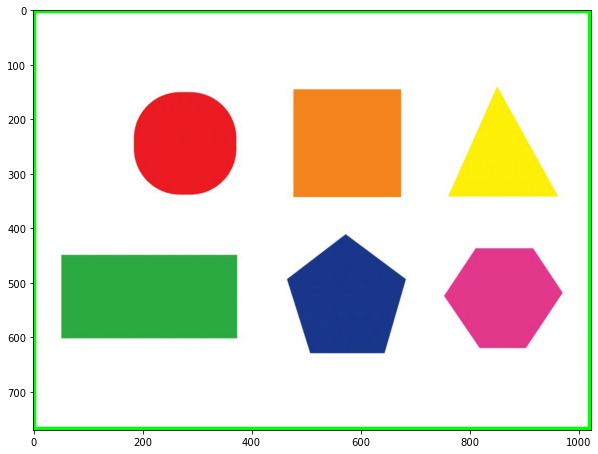

In [15]:
# Fit circle to objectd of an image

gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
ret,thresh = cv2.threshold(gray,10,255,0)
contours = cv2.findContours(thresh, 1, 2)[0]

# loop over the contours again
for (i, c) in enumerate(contours):
    clone = image.copy()
    print("Contour #{}".format(i + 1))
 
    # draw the contour on the image
    cv2.drawContours(clone, [c], -1, (0, 255, 0), 10)
 
    # compute the center of the contour and draw the contour number
    M = cv2.moments(c)
    cX = int(M["m10"] / M["m00"])
    cY = int(M["m01"] / M["m00"])
    cv2.putText(clone, "#{}".format(i + 1), (cX - 20, cY), cv2.FONT_HERSHEY_SIMPLEX,
        1.25, (255, 255, 255), 4)
    
    (x,y),radius = cv2.minEnclosingCircle(c)
    center = (int(x),int(y))
    radius = int(radius)
    clone = cv2.circle(clone,center,radius,(0,255,0),4)
    
    show_image(clone)

### 1.3 Advanced Contour Features

#### 1.3.1 Aspect Ratio

Contour #1 -- aspect Ratio: 5.36


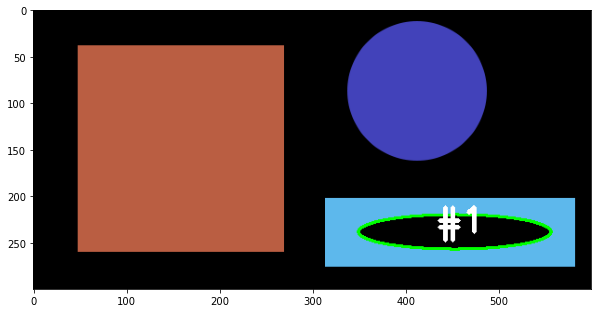

Contour #2 -- aspect Ratio: 3.64


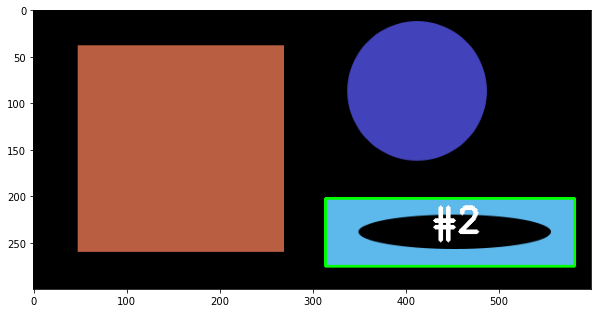

Contour #3 -- aspect Ratio: 1.00


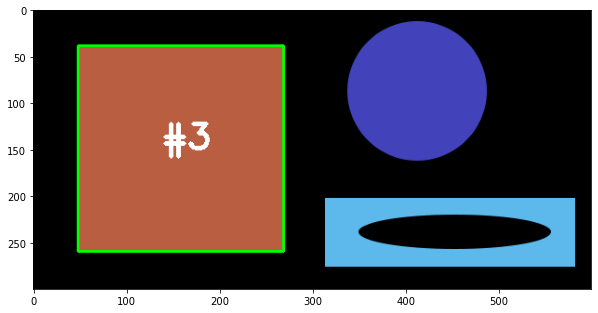

Contour #4 -- aspect Ratio: 1.00


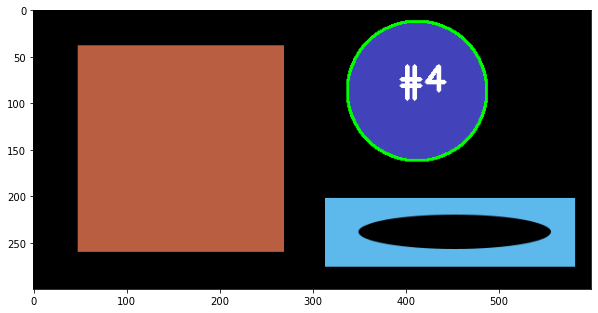

In [16]:
image = cv2.imread('../img/basic_shapes.png')
gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
ret,thresh = cv2.threshold(gray,10,255,0)
contours = cv2.findContours(thresh, 1, 2)[0]

# loop over the contours again
for (i, c) in enumerate(contours):
    clone = image.copy()
    
    # compute the area and the aspect ratio of the contour
    x,y,w,h = cv2.boundingRect(c)
    aspect_ratio = float(w)/h
    print("Contour #{} -- aspect Ratio: {:.2f}".format(i + 1, aspect_ratio))
 
    # draw the contour on the image
    cv2.drawContours(clone, [c], -1, (0, 255, 0), 2)
 
    # compute the center of the contour and draw the contour number
    M = cv2.moments(c)
    cX = int(M["m10"] / M["m00"])
    cY = int(M["m01"] / M["m00"])
    cv2.putText(clone, "#{}".format(i + 1), (cX - 20, cY), cv2.FONT_HERSHEY_SIMPLEX,
        1.25, (255, 255, 255), 4)
    
    show_image(clone)

#### 1.3.2 Extent

Contour #1 -- area: 6008.00, Rectangular area: 8151.00, extent: 0.74


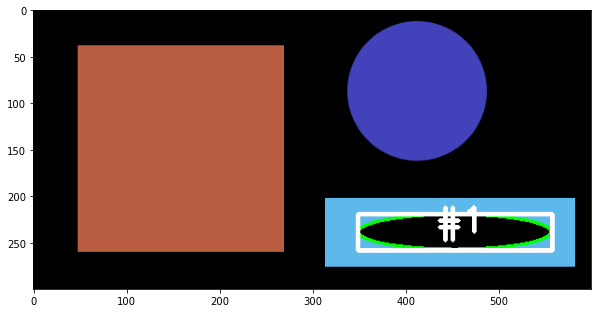

Contour #2 -- area: 19564.00, Rectangular area: 19906.00, extent: 0.98


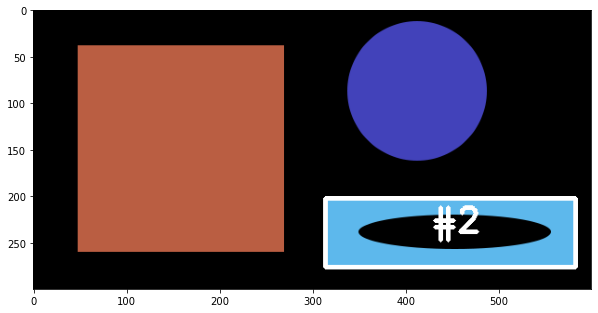

Contour #3 -- area: 48841.00, Rectangular area: 49284.00, extent: 0.99


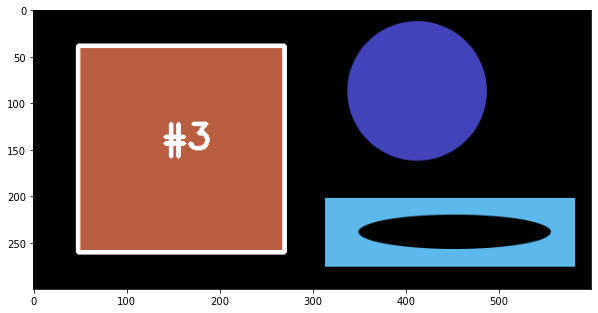

Contour #4 -- area: 17647.00, Rectangular area: 22500.00, extent: 0.78


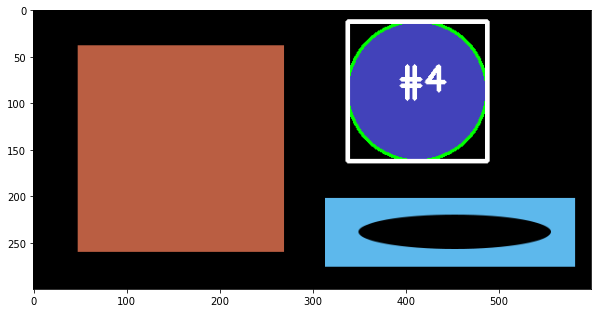

In [17]:
image = cv2.imread('../img/basic_shapes.png')
gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
ret,thresh = cv2.threshold(gray,10,255,0)
contours = cv2.findContours(thresh, 1, 2)[0]

# loop over the contours again
for (i, c) in enumerate(contours):
    clone = image.copy()
    
    # compute the area and the aspect ratio of the contour
    area = cv2.contourArea(c)
    x,y,w,h = cv2.boundingRect(c)
    rect_area = w*h
    extent = float(area)/rect_area
    print("Contour #{} -- area: {:.2f}, Rectangular area: {:.2f}, extent: {:.2f}".format(i + 1, area, rect_area, extent))
 
    # draw the contour on the image
    cv2.drawContours(clone, [c], -1, (0, 255, 0), 2)
 
    # compute the center of the contour and draw the contour number
    M = cv2.moments(c)
    cX = int(M["m10"] / M["m00"])
    cY = int(M["m01"] / M["m00"])
    cv2.putText(clone, "#{}".format(i + 1), (cX - 20, cY), cv2.FONT_HERSHEY_SIMPLEX,
        1.25, (255, 255, 255), 4)
    
    x,y,w,h = cv2.boundingRect(c)
    cv2.rectangle(clone,(x,y),(x+w,y+h),(255,255,255),4)
    
    show_image(clone)

#### 1.3.3 Convexity

Contour #1 -- Convex: True


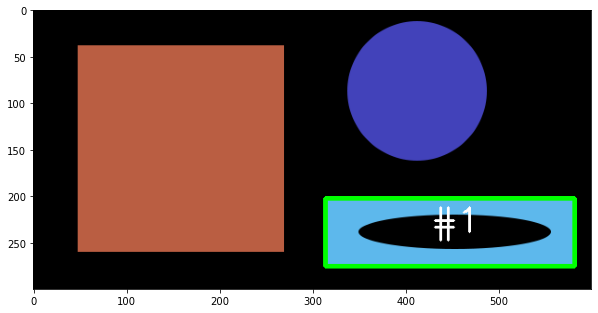

Contour #2 -- Convex: False


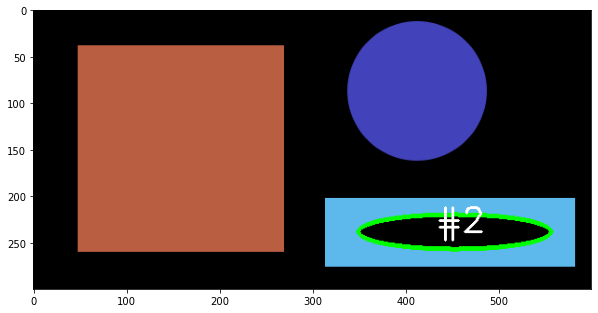

Contour #3 -- Convex: True


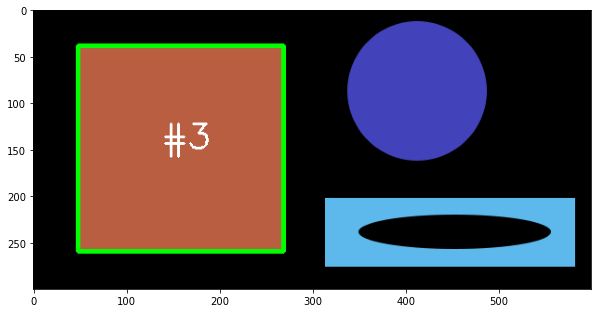

Contour #4 -- Convex: False


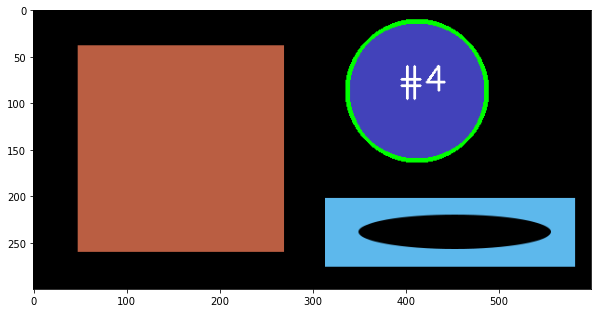

In [18]:
image = cv2.imread('../img/basic_shapes.png')
gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
ret,thresh = cv2.threshold(gray,10,255,0)
contours = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)[0]

# loop over the contours again
for (i, c) in enumerate(contours):
    clone = image.copy()
    
    # Check convexity
    is_convex = cv2.isContourConvex(c)
    print("Contour #{} -- Convex: {}".format(i + 1, is_convex))
 
    # draw the contour on the image
    cv2.drawContours(clone, [c], -1, (0, 255, 0), 4)
 
    # compute the center of the contour and draw the contour number
    M = cv2.moments(c)
    cX = int(M["m10"] / M["m00"])
    cY = int(M["m01"] / M["m00"])
    cv2.putText(clone, "#{}".format(i + 1), (cX - 20, cY), cv2.FONT_HERSHEY_SIMPLEX,
        1.25, (255, 255, 255), 2)
    
    show_image(clone)

#### 1.3.4 Solidity

Contour #1 -- area: 3508.0, Hull Area: 4321.0, Solidity: 0.8118491090025457


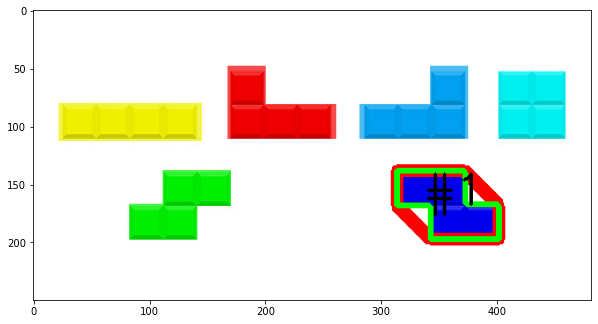

Contour #2 -- area: 3452.0, Hull Area: 4292.0, Solidity: 0.804287045666356


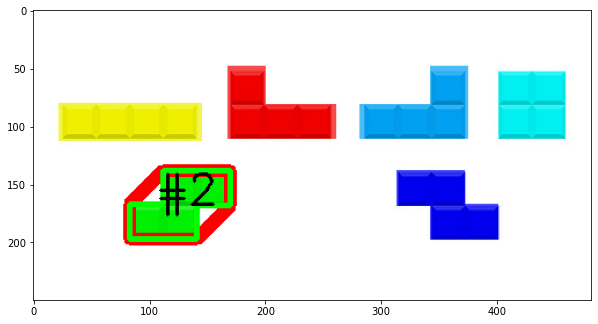

Contour #3 -- area: 3936.0, Hull Area: 3936.0, Solidity: 1.0


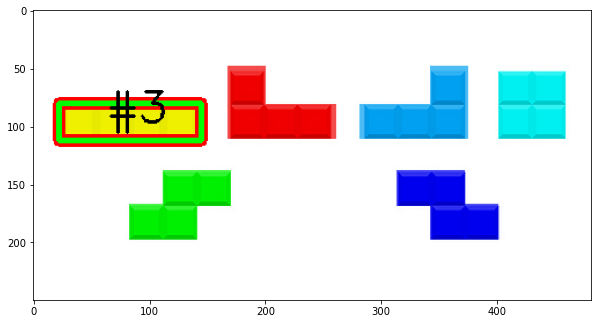

Contour #4 -- area: 3249.0, Hull Area: 3249.0, Solidity: 1.0


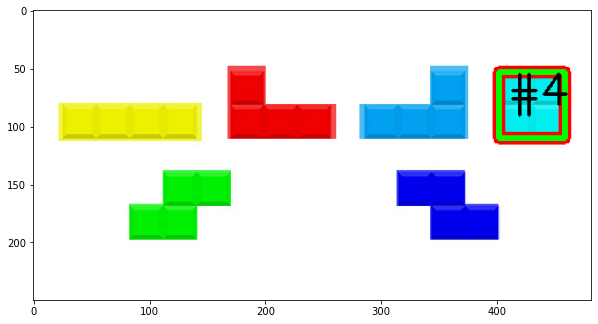

Contour #5 -- area: 3753.5, Hull Area: 4759.5, Solidity: 0.788633259796197


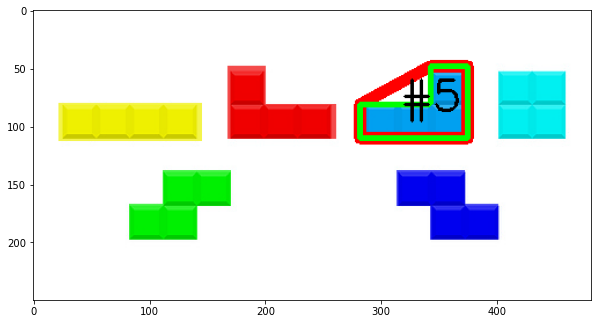

Contour #6 -- area: 3753.5, Hull Area: 4759.5, Solidity: 0.788633259796197


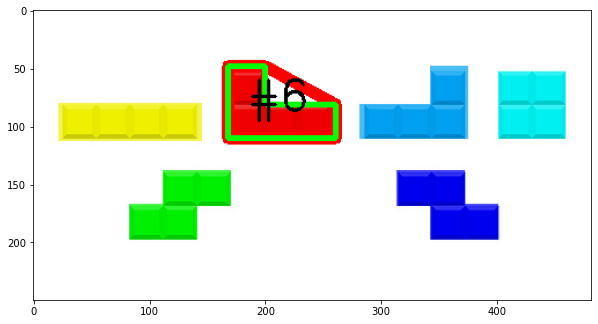

In [19]:
# load the tic-tac-toe image and convert it to grayscale
image = cv2.imread("../img/tetris_blocks.png")
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
thresh = cv2.threshold(gray, 225, 255, cv2.THRESH_BINARY_INV)[1]
contours = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)[0]

# loop over the contours again
for (i, c) in enumerate(contours):
    clone = image.copy()
    
    area = cv2.contourArea(c)
    hull = cv2.convexHull(c)
    hull_area = cv2.contourArea(hull)
    solidity = float(area)/hull_area
    
    # Check convexity
    print(f"Contour #{i+1} -- area: {area}, Hull Area: {hull_area}, Solidity: {solidity}")
 
    # draw the contour and hull on the image
    cv2.drawContours(clone, [hull], -1, 255, 10)
    cv2.drawContours(clone, [c], -1, (0, 255, 0), 4)
 
    # compute the center of the contour and draw the contour number
    M = cv2.moments(c)
    cX = int(M["m10"] / M["m00"])
    cY = int(M["m01"] / M["m00"])
    cv2.putText(clone, "#{}".format(i + 1), (cX - 20, cY), cv2.FONT_HERSHEY_SIMPLEX,
        1.25, (0, 0, 0), 2)
    
    show_image(clone)

### 2. Identifying Shapes in Images using Contours

Contour #1 -- aspect_ratio=1.48, extent=0.66, solidity=0.81
Contour #2 -- aspect_ratio=1.47, extent=0.65, solidity=0.80
Contour #3 -- aspect_ratio=3.76, extent=0.96, solidity=1.00
Contour #4 -- aspect_ratio=1.00, extent=0.97, solidity=1.00
Contour #5 -- aspect_ratio=1.49, extent=0.63, solidity=0.79
Contour #6 -- aspect_ratio=1.49, extent=0.63, solidity=0.79


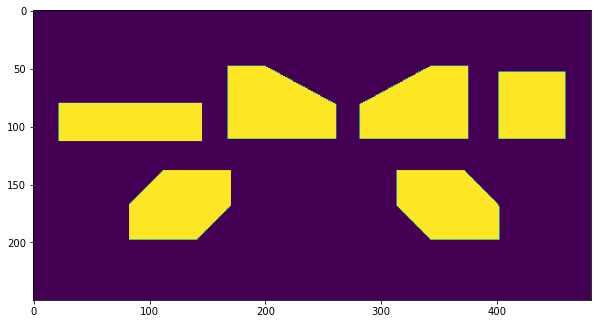

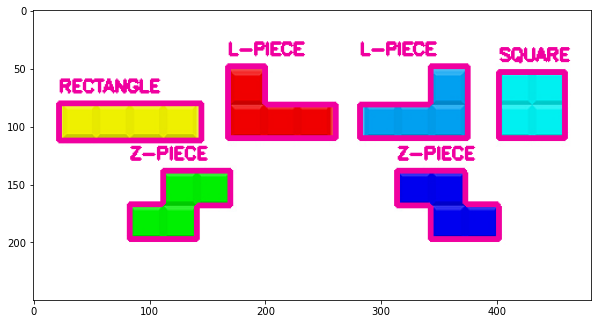

In [20]:
# load the Tetris block image, convert it to grayscale, and threshold
# the image
image = cv2.imread("../img/tetris_blocks.png")
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
thresh = cv2.threshold(gray, 225, 255, cv2.THRESH_BINARY_INV)[1]
 
# show the original and thresholded images
cv2.imshow("Original", image)
cv2.imshow("Thresh", thresh)
 
# find external contours in the thresholded image and allocate memory
# for the convex hull image
cnts = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)[0]
hullImage = np.zeros(gray.shape[:2], dtype="uint8")

# loop over the contours
for (i, c) in enumerate(cnts):
    # compute the area of the contour along with the bounding box
    # to compute the aspect ratio
    area = cv2.contourArea(c)
    (x, y, w, h) = cv2.boundingRect(c)

    # compute the aspect ratio of the contour, which is simply the width
    # divided by the height of the bounding box
    aspectRatio = w / float(h)

    # use the area of the contour and the bounding box area to compute
    # the extent
    extent = area / float(w * h)

    # compute the convex hull of the contour, then use the area of the
    # original contour and the area of the convex hull to compute the
    # solidity
    hull = cv2.convexHull(c)
    hullArea = cv2.contourArea(hull)
    solidity = area / float(hullArea)

    # visualize the original contours and the convex hull and initialize
    # the name of the shape
    cv2.drawContours(hullImage, [hull], -1, 255, -1)
    cv2.drawContours(image, [c], -1, (240, 0, 159), 3)
    shape = ""
    
    # if the aspect ratio is approximately one, then the shape is a square
    if aspectRatio >= 0.98 and aspectRatio <= 1.02:
        shape = "SQUARE"

    # if the width is 3x longer than the height, then we have a rectangle
    elif aspectRatio >= 3.0:
        shape = "RECTANGLE"

    # if the extent is sufficiently small, then we have a L-piece
    elif extent < 0.65:
        shape = "L-PIECE"

    # if the solidity is sufficiently large enough, then we have a Z-piece
    elif solidity > 0.80:
        shape = "Z-PIECE"

    # draw the shape name on the image
    cv2.putText(image, shape, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5,
        (240, 0, 159), 2)

    # show the contour properties
    print("Contour #{} -- aspect_ratio={:.2f}, extent={:.2f}, solidity={:.2f}"
        .format(i + 1, aspectRatio, extent, solidity))

# show the output images
show_image(hullImage)
show_image(image)

### EXERCISE: Use contour properties to identify shape of objects in the following image

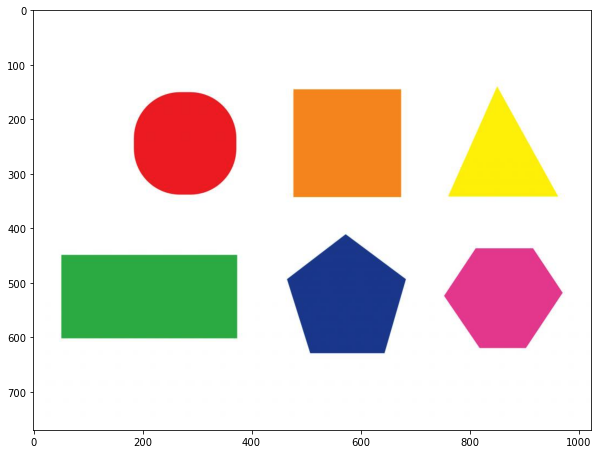

In [21]:
image = np.flip(cv2.imread("../img/shapes.png"), axis = 2)
show_image(image)

Contour #1 -- aspect_ratio=2.10, extent=0.98, solidity=1.00
Contour #2 -- aspect_ratio=1.18, extent=0.71, solidity=0.99
Contour #3 -- aspect_ratio=1.00, extent=0.69, solidity=0.99
Contour #4 -- aspect_ratio=1.00, extent=0.82, solidity=0.99
Contour #5 -- aspect_ratio=1.00, extent=0.99, solidity=1.00
Contour #6 -- aspect_ratio=1.00, extent=0.50, solidity=0.99


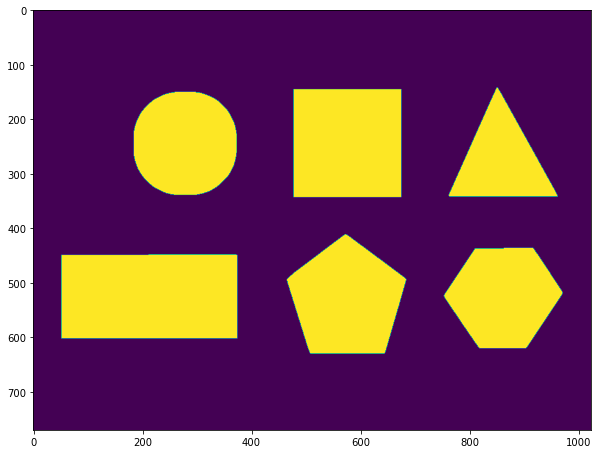

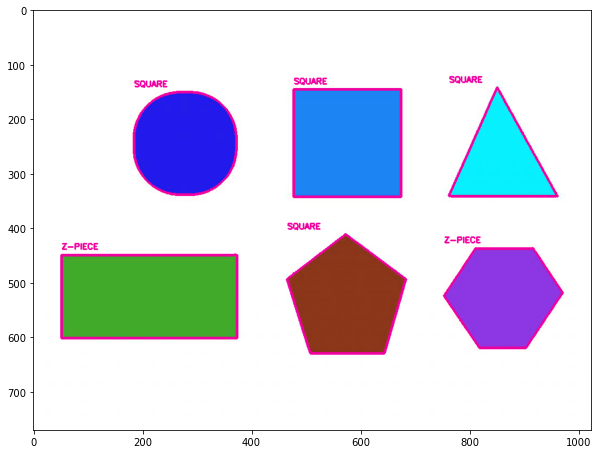

In [22]:
# TODO: Your code below
image = cv2.imread("../img/shapes.png")
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
thresh = cv2.threshold(gray, 225, 255, cv2.THRESH_BINARY_INV)[1]
 
# show the original and thresholded images
cv2.imshow("Original", image)
cv2.imshow("Thresh", thresh)
 
# find external contours in the thresholded image and allocate memory
# for the convex hull image
cnts = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)[0]
hullImage = np.zeros(gray.shape[:2], dtype="uint8")

# loop over the contours
for (i, c) in enumerate(cnts):
    # compute the area of the contour along with the bounding box
    # to compute the aspect ratio
    area = cv2.contourArea(c)
    (x, y, w, h) = cv2.boundingRect(c)

    # compute the aspect ratio of the contour, which is simply the width
    # divided by the height of the bounding box
    aspectRatio = w / float(h)

    # use the area of the contour and the bounding box area to compute
    # the extent
    extent = area / float(w * h)

    # compute the convex hull of the contour, then use the area of the
    # original contour and the area of the convex hull to compute the
    # solidity
    hull = cv2.convexHull(c)
    hullArea = cv2.contourArea(hull)
    solidity = area / float(hullArea)

    # visualize the original contours and the convex hull and initialize
    # the name of the shape
    cv2.drawContours(hullImage, [hull], -1, 255, -1)
    cv2.drawContours(image, [c], -1, (240, 0, 159), 3)
    shape = ""
    
    # if the aspect ratio is approximately one, then the shape is a square
    if aspectRatio >= 0.98 and aspectRatio <= 1.02:
        shape = "SQUARE"

    # if the width is 3x longer than the height, then we have a rectangle
    elif aspectRatio >= 3.0:
        shape = "RECTANGLE"

    # if the extent is sufficiently small, then we have a L-piece
    elif extent < 0.65:
        shape = "L-PIECE"

    # if the solidity is sufficiently large enough, then we have a Z-piece
    elif solidity > 0.80:
        shape = "Z-PIECE"

    # draw the shape name on the image
    cv2.putText(image, shape, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5,
        (240, 0, 159), 2)

    # show the contour properties
    print("Contour #{} -- aspect_ratio={:.2f}, extent={:.2f}, solidity={:.2f}"
        .format(i + 1, aspectRatio, extent, solidity))

# show the output images
show_image(hullImage)
show_image(image)

### 1.4 Contour Retrieval Modes

RETR_LIST


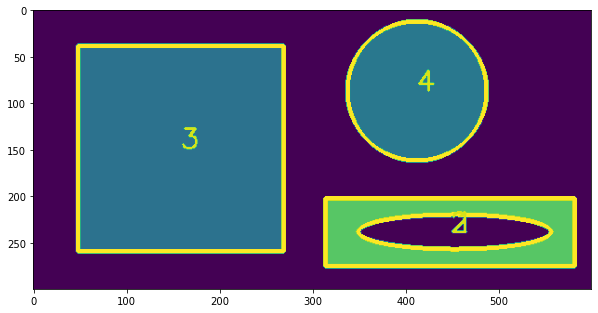

RETR_EXTERNAL


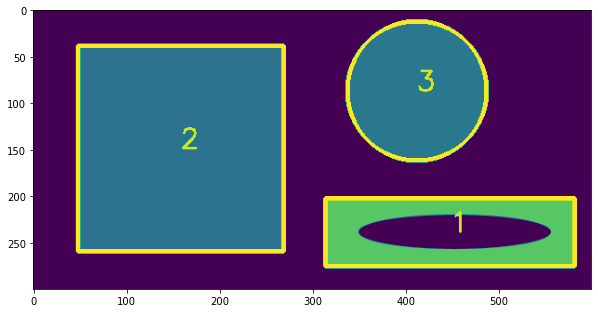

RETR_CCOMP


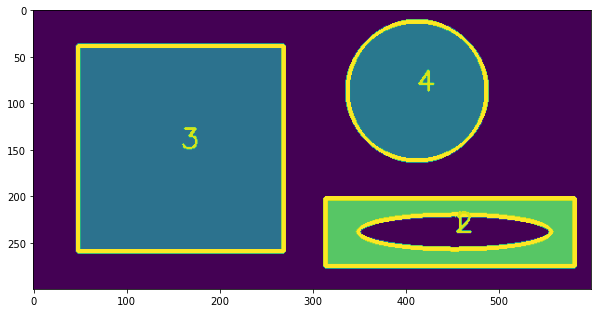

RETR_TREE


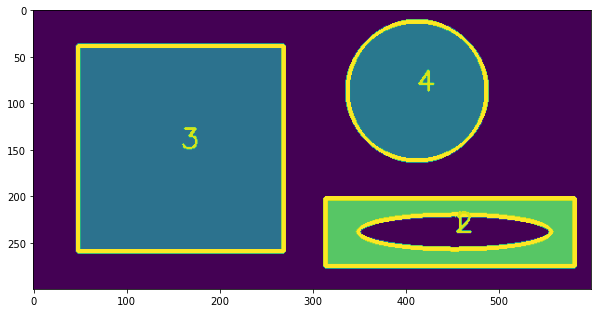

In [23]:
image = cv2.imread('../img/basic_shapes.png')
gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
ret,thresh = cv2.threshold(gray,10,255,0)

contour_retrieval_modes = [cv2.RETR_LIST, cv2.RETR_EXTERNAL, cv2.RETR_CCOMP, cv2.RETR_TREE]
names = ['RETR_LIST', 'RETR_EXTERNAL', 'RETR_CCOMP', 'RETR_TREE']

for rm, name in zip(contour_retrieval_modes, names):
    img = gray.copy()
    contours = cv2.findContours(thresh,rm,cv2.CHAIN_APPROX_SIMPLE)[0]
    
    for (i, c) in enumerate(contours):
        (x, y, w, h) = cv2.boundingRect(c)
        
        M = cv2.moments(c)
        cX = int(M["m10"] / M["m00"])
        cY = int(M["m01"] / M["m00"])
        
        cv2.drawContours(img, [c], -1, (255, 255, 255), 4)
        
        
        # draw the shape name on the image
        cv2.putText(img, str(i+1), (cX, cY), cv2.FONT_HERSHEY_SIMPLEX, 1, (240, 0, 159), 2)
    
    print(name)
    show_image(img)

### PROJECT: Identify Xs and Os in the tic tac toe board

O (Contour #1) -- solidity=0.98
X (Contour #2) -- solidity=0.60
O (Contour #3) -- solidity=0.98
X (Contour #4) -- solidity=0.60
X (Contour #5) -- solidity=0.60
O (Contour #6) -- solidity=0.98
? (Contour #7) -- solidity=0.28


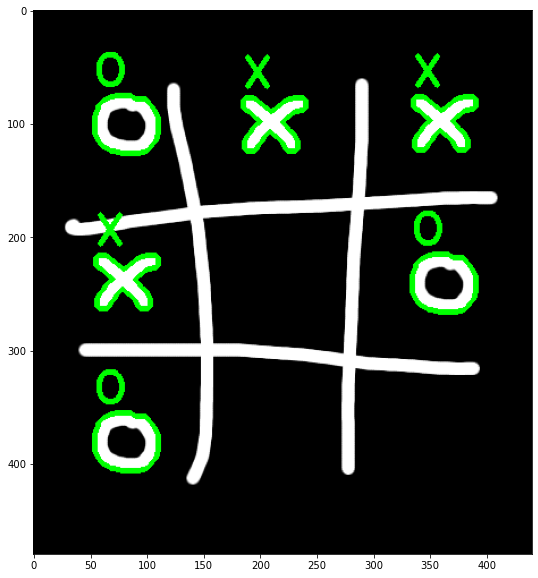

In [24]:
image = cv2.imread("../img/tictactoe.png")
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
 
# find all contours on the tic-tac-toe board
cnts = cv2.findContours(gray.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)[0]
 
# loop over the contours
for (i, c) in enumerate(cnts):
    # compute the area of the contour along with the bounding box
    # to compute the aspect ratio
    area = cv2.contourArea(c)
    (x, y, w, h) = cv2.boundingRect(c)

    # compute the convex hull of the contour, then use the area of the
    # original contour and the area of the convex hull to compute the
    # solidity
    hull = cv2.convexHull(c)
    hullArea = cv2.contourArea(hull)
    solidity = area / float(hullArea)

    # initialize the character text
    char = "?"

    # if the solidity is high, then we are examining an `O`
    if solidity > 0.9:
        char = "O"

    # otherwise, if the solidity it still reasonabably high, we
    # are examining an `X`
    elif solidity > 0.5:
        char = "X"

    # if the character is not unknown, draw it
    if char != "?":
        cv2.drawContours(image, [c], -1, (0, 255, 0), 3)
        cv2.putText(image, char, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 1.25,
            (0, 255, 0), 4)

    # show the contour properties
    print("{} (Contour #{}) -- solidity={:.2f}".format(char, i + 1, solidity))
    
show_image(image)

In [25]:
# %load ../solutions/tic-tac-toe.py
# load the tic-tac-toe image and convert it to grayscale


### PROJECT: Use contour properties to identify licence plate in images

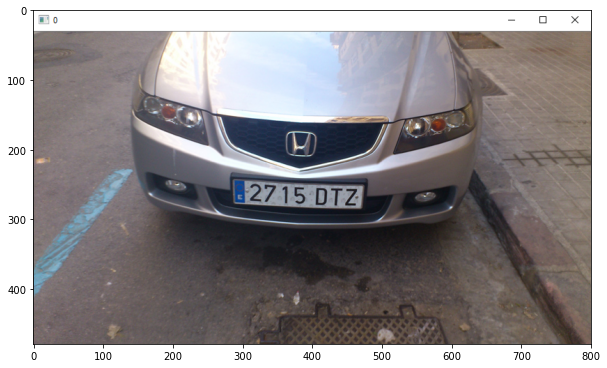

In [26]:
# take an image, blur it, threshold it, use a masking method to get the receict, 
#canny edge detection to detect character

# Licence plate recognition system - Version 1

image = np.flip(cv2.imread("../img/licence_plate_raw.png"), axis = 2)
show_image(image)


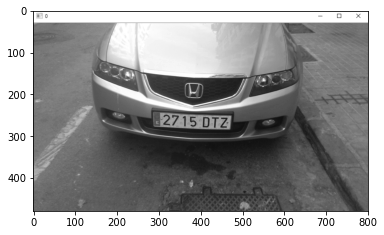

In [27]:
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) #convert to grey scale
plt.imshow(gray, cmap='gray', vmin = 0, vmax = 255)

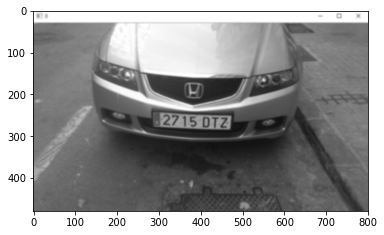

In [28]:
blur = cv2.GaussianBlur(gray,(7,7),0)

plt.imshow(blur, cmap='gray', vmin = 0, vmax = 255)

In [29]:
edged = cv2.Canny(blur, 30, 200) #Perform Edge detection
# plt.figure(figsize=(20,10))
# plt.subplot(221),plt.imshow(edged,cmap = 'gray')

In [30]:
contours=cv2.findContours(gray.copy(),cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
contours = imutils.grab_contours(contours)
contours = sorted(contours,key=cv2.contourArea, reverse = True)[:10]
screenCnt = None


(<AxesSubplot:>, <matplotlib.image.AxesImage at 0x1cf0b819a60>)

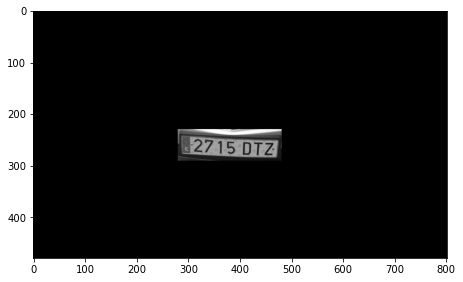

In [31]:
# Masking the part other than the number plate

mask = np.zeros(gray.shape[:2], dtype="uint8")
cv2.rectangle(mask, (280, 230), (480, 290), 255, -1)
masked = cv2.bitwise_and(gray, gray, mask=mask)
plt.figure(figsize=(20,10))
plt.subplot(221),plt.imshow(masked,cmap = 'gray')

(<AxesSubplot:>, <matplotlib.image.AxesImage at 0x1cf0be60c70>)

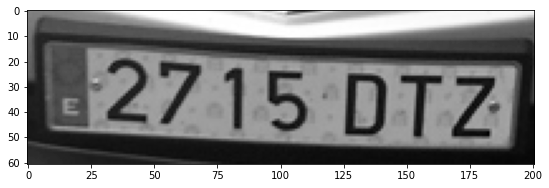

In [32]:
# Now crop
(x, y) = np.where(mask == 255)
(topx, topy) = (np.min(x), np.min(y))
(bottomx, bottomy) = (np.max(x), np.max(y))
Cropped = gray[topx:bottomx+1, topy:bottomy+1]
plt.figure(figsize=(20,10))
plt.subplot(221),plt.imshow(Cropped, cmap = 'gray')

In [33]:
pytesseract.pytesseract.tesseract_cmd = r'C:\Program Files\Tesseract-OCR\tesseract.exe'

In [34]:
text = pytesseract.image_to_string(Cropped, config='--psm 11')
print("License plate Number is:",text)
img = cv2.resize(image,(500,300))
Cropped = cv2.resize(Cropped,(400,200))
cv2.imshow('car',image)
cv2.imshow('Cropped',Cropped)

License plate Number is: 


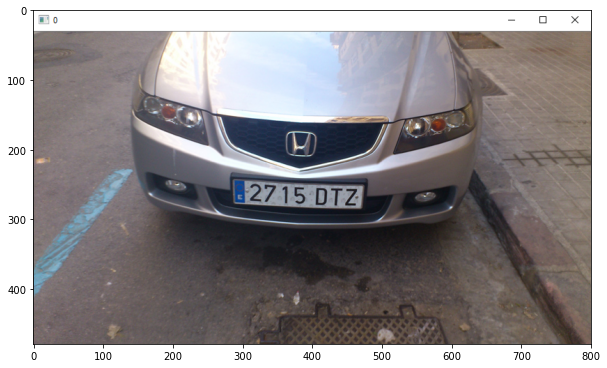

In [35]:
# trying with black hat operation
# Licence plate recognition system - Version 2

image = np.flip(cv2.imread("../img/licence_plate_raw.png"), axis = 2)
show_image(image)

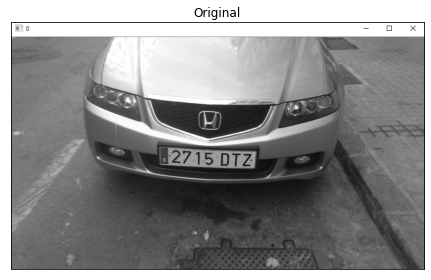

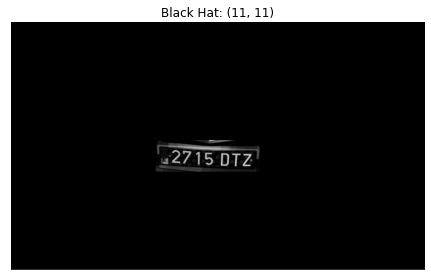

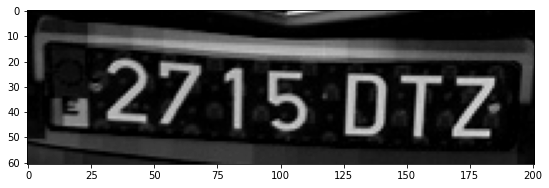

License plate Number: 2715 DTZ



In [37]:
image = cv2.imread('../img/licence_plate_raw.png')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

plt.figure(figsize=(20,10))
plt.subplot(2,2,1),plt.imshow(gray, cmap = 'gray')
plt.title('Original'), plt.xticks([]), plt.yticks([])

kernel_size= (11,11)

# loop over the kernels and apply a "closing" operation to the image
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, kernel_size)
white_hat = cv2.morphologyEx(gray, cv2.MORPH_BLACKHAT, kernel)

mask = np.zeros(white_hat.shape[:2], dtype="uint8")
cv2.rectangle(mask, (280, 230), (480, 290), 255, -1)
masked = cv2.bitwise_and(white_hat, white_hat, mask=mask)
plt.figure(figsize=(20,10))
plt.subplot(221),plt.imshow(masked,cmap = 'gray')

# plt.subplot(2,2,i+2),plt.imshow(white_hat, cmap = 'gray')
plt.title(f"Black Hat: ({kernel_size[0]}, {kernel_size[1]})"), plt.xticks([]), plt.yticks([])
plt.show()
(x, y) = np.where(mask == 255)
(topx, topy) = (np.min(x), np.min(y))
(bottomx, bottomy) = (np.max(x), np.max(y))
Cropped = masked[topx:bottomx+1, topy:bottomy+1]
plt.figure(figsize=(20,10))
plt.subplot(221),plt.imshow(Cropped, cmap = 'gray')
plt.show()
text = pytesseract.image_to_string(Cropped, config='--psm 11')
print("License plate Number:",text)
img = cv2.resize(image,(500,300))
Cropped = cv2.resize(Cropped,(400,200))